In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pip install kagglehub

     ---------------------------------------- 43.0/43.0 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/resume-dataset")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 383k/383k [00:01<00:00, 391kB/s]

Extracting files...
Path to dataset files: C:\Users\BINDU SATYA\.cache\kagglehub\datasets\gauravduttakiit\resume-dataset\versions\1


In [19]:
import os

# List files in the downloaded dataset directory
files = os.listdir(path)
print("Files in dataset:", files)


Files in dataset: ['UpdatedResumeDataSet.csv']


In [26]:
# Assuming the dataset contains a file named "data.csv"
csv_file = os.path.join(path, "UpdatedResumeDataSet.csv")
df = pd.read_csv(csv_file)

print(df.head())  # Display the first few rows


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [136]:
df.shape

(962, 2)

In [28]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

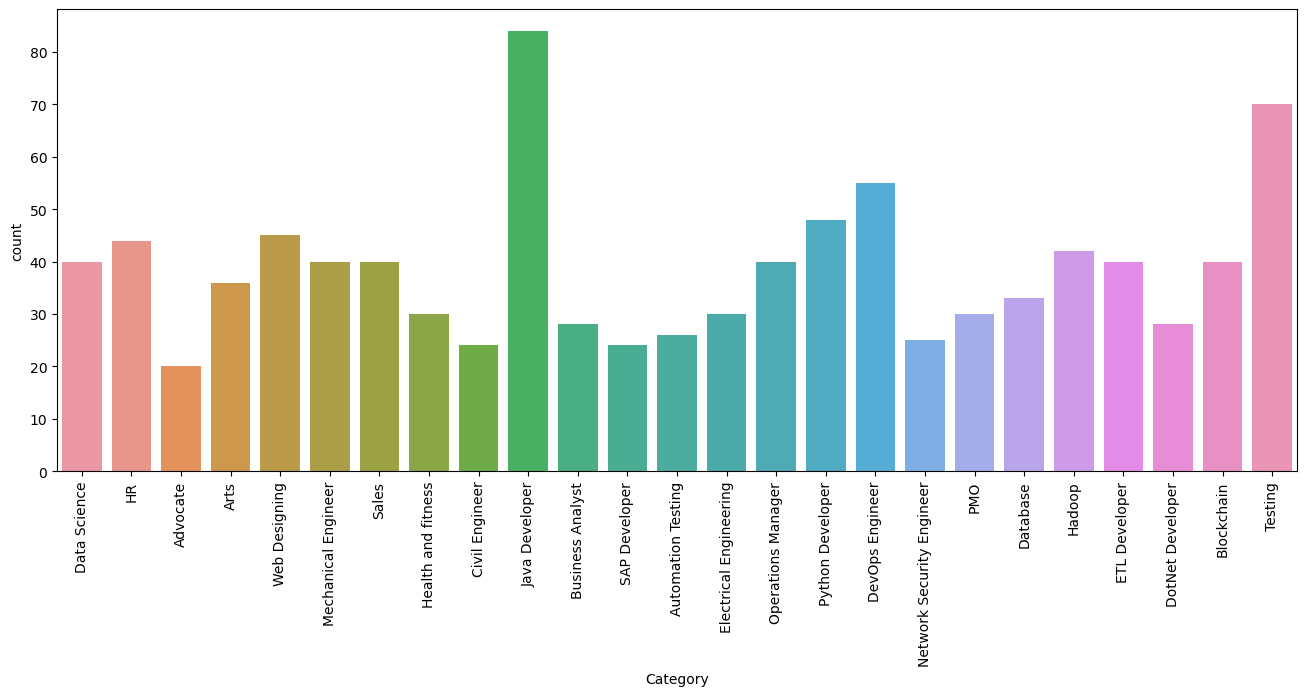

In [35]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Category', data=df)
plt.xticks(rotation = 90)
plt.show()

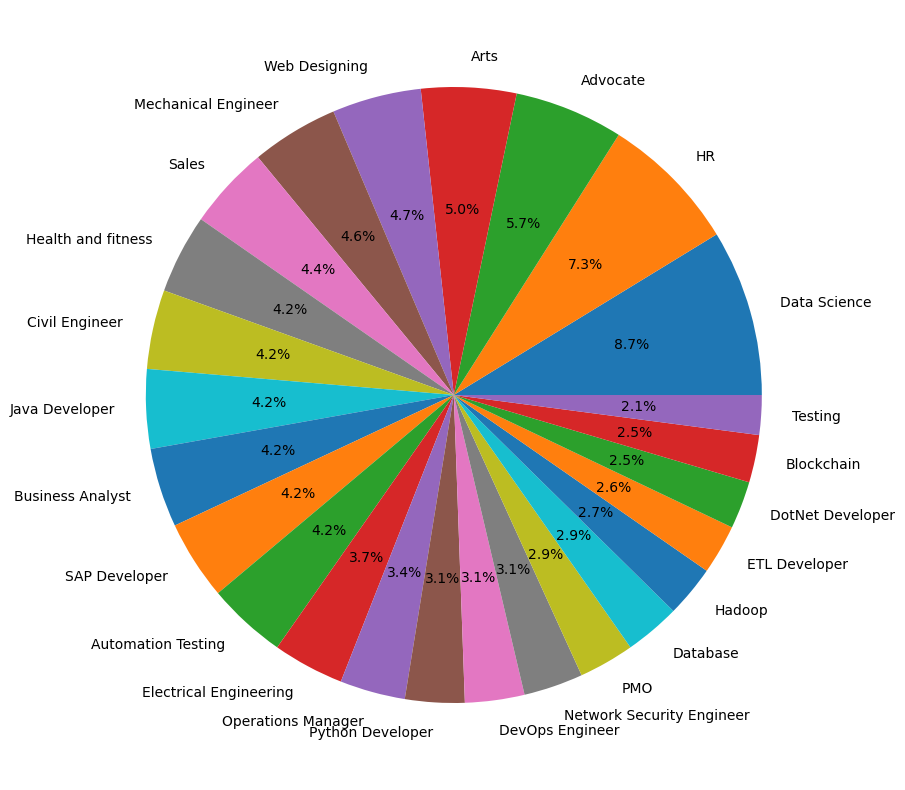

In [47]:
labels = df['Category'].unique()
counts = df['Category'].value_counts()
plt.figure(figsize=(16, 10))
plt.pie(counts,labels = labels,autopct = '%1.1f%%')
plt.show()

In [48]:
df['Category'][0]

'Data Science'

In [50]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning

In [78]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [85]:
 ## text = "my wobesigte is http://Chatattive.com and not anywhere whit @gmailhell #absjca"
 ## cleanResume(text)

In [81]:
df['Resume'] = df['Resume'].apply(lambda y:cleanResume(y))

In [82]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [89]:
df['Category'] =  le.fit_transform(df['Category'])

In [90]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [91]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
transformed_output = tfidf.fit_transform(df['Resume'])

In [134]:
transformed_output

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [122]:
print(tfidf.vocabulary_)

{'skills': 6080, 'programming': 5160, 'languages': 3713, 'python': 5266, 'pandas': 4742, 'numpy': 4490, 'scipy': 5857, 'scikit': 5855, 'learn': 3756, 'matplotlib': 4069, 'sql': 6239, 'java': 3537, 'javascript': 3539, 'jquery': 3581, 'machine': 3928, 'learning': 3760, 'regression': 5477, 'svm': 6454, 'na': 4344, 've': 7038, 'bayes': 821, 'knn': 3656, 'random': 5347, 'forest': 2734, 'decision': 1839, 'trees': 6806, 'boosting': 944, 'techniques': 6568, 'cluster': 1316, 'analysis': 483, 'word': 7266, 'embedding': 2263, 'sentiment': 5945, 'natural': 4369, 'language': 3712, 'processing': 5118, 'dimensionality': 2012, 'reduction': 5450, 'topic': 6722, 'modelling': 4239, 'lda': 3743, 'nmf': 4446, 'pca': 4822, 'neural': 4419, 'nets': 4412, 'database': 1779, 'visualizations': 7124, 'mysql': 4342, 'sqlserver': 6246, 'cassandra': 1123, 'hbase': 3034, 'elasticsearch': 2236, 'd3': 1758, 'js': 3583, 'dc': 1809, 'plotly': 4952, 'kibana': 3643, 'ggplot': 2884, 'tableau': 6486, 'regular': 5478, 'express

In [124]:
all_features_names = tfidf.get_feature_names_out()

In [132]:
for word in all_features_names:
    ind = tfidf.vocabulary_.get(word)
    if(tfidf.idf_[ind]<2):
        print(f"{word} -> {tfidf.idf_[ind]}")

college -> 1.9090480721748522
company -> 1.0
computer -> 1.9979356223227098
data -> 1.832182491875988
description -> 1.0
details -> 1.0
development -> 1.9039066726744336
education -> 1.2005553219402465
engineering -> 1.853896252099772
exprience -> 1.2539882266653084
january -> 1.7697344597780615
maharashtra -> 1.3930810489084426
management -> 1.6900367581455529
months -> 1.4008030950023531
monthscompany -> 1.2539882266653084
project -> 1.5421166280689307
skill -> 1.0
skills -> 1.5952913905561867
software -> 1.888639200543645
team -> 1.597176405251958
technical -> 1.8587862373939639
technology -> 1.9619704736291945
university -> 1.5261729776717947
work -> 1.888639200543645
working -> 1.745370020903921
year -> 1.9039066726744336


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(transformed_output, df['Category'], test_size=0.2, random_state=42)

In [140]:
y_train

468     2
857     3
549    18
280    14
109     1
       ..
106     1
270    14
860     3
435    21
102     0
Name: Category, Length: 769, dtype: int64

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score


clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [147]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23], dtype=int64)

In [148]:
print(accuracy_score(y_test,y_pred))

0.9844559585492227


In [150]:
clf

KNeighborsClassifier()

#Exporting

In [156]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [157]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = clf.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

6